In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
top100_hadoop_results = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]

In [3]:
tot_rel = top100_hadoop_results.count(1)

In [4]:
def precision_list(result):
    pre_list = []
    for (i,r) in enumerate(result):
        n = i+1
        precision = sum(result[:n])/n
        pre_list.append(precision)
    return pre_list

In [5]:
pre_result = precision_list(top100_hadoop_results)

In [6]:
def recall_list(result, tot_rel):
    recall_list=[]
    for (i,r) in enumerate(result):
        n = i+1
        recall = sum(result[:n])/tot_rel
        recall_list.append(recall)
    return recall_list

In [7]:
recall_result = recall_list(top100_hadoop_results, tot_rel)

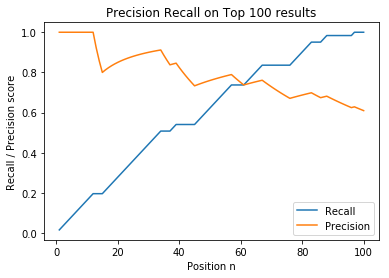

In [8]:
plt.xlabel('Position n')
plt.ylabel('Recall / Precision score')
plt.title('Precision Recall on Top 100 results')
plt.plot(np.arange(1,101),recall_result, label = 'Recall')
plt.plot(np.arange(1,101),pre_result, label = 'Precision')
plt.legend()
plt.show()

In [9]:
def get_F1(recall_result, precision_result):
    f1_list = []
    for (r,p) in zip(recall_result, precision_result):
        f1_score = 2*((p*r)/(p+r))
        f1_list.append(f1_score)
    return f1_list

In [10]:
f1_result = get_F1(recall_result, pre_result)

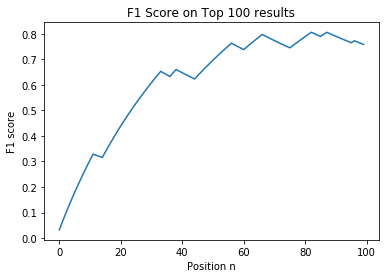

In [11]:
plt.xlabel('Position n')
plt.ylabel('F1 score')
plt.title('F1 Score on Top 100 results')
plt.plot(f1_result)
plt.show()

In [12]:
def getDCG(result):
    dcg_list = []
    total = result[0]/1
    dcg_list.append(total)
    for i,r in enumerate(result[1:]):
        position = i+2
        dcg = r/math.log2(position)
        total += dcg
        dcg_list.append(total)
    return dcg_list

In [13]:
dcg_list = getDCG(top100_hadoop_results)

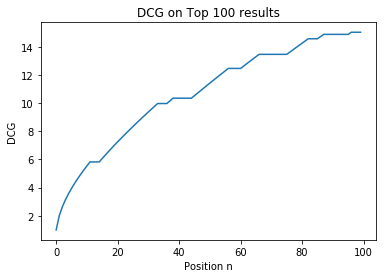

In [14]:
plt.xlabel('Position n')
plt.ylabel('DCG')
plt.title('DCG on Top 100 results')
plt.plot(dcg_list)
plt.show()

In [15]:
def get_avg_pre(result, precision_result):
    avg_pre_list = []
    for (i, r) in enumerate(precision_result):
        n = i+1
        avg_pre = r/sum(result[:n])
        avg_pre_list.append(avg_pre)
    return avg_pre_list

In [16]:
avg_pre_result = get_avg_pre(top100_hadoop_results, pre_result)

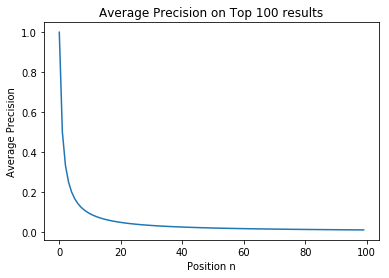

In [17]:
plt.xlabel('Position n')
plt.ylabel('Average Precision')
plt.title('Average Precision on Top 100 results')
plt.plot(avg_pre_result)
plt.show()